In [94]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
try:
    nltk.download('stopwords')
except:
    pass
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xer0bit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
with open('Dataset/Cell_Phones_and_Accessories_5_copy_30000.json') as f:
    data = json.load(f)


In [96]:
df = pd.DataFrame(data)

In [97]:
df.head()

,reviewText,overall,summary
0,I wanted a micro-knit stylus that I could carr...,4,Stylus tip protection without the cap
1,Even before I opened the plastic resealable en...,2,You get what you pay for.
2,This product arrived broken and I could not us...,1,crap
3,We just went on our first camping trip of the ...,5,Valuable Tool for daily use and Camping
4,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s


In [98]:
df['overall'].mean()

3.983966666666667

#### List of Positive and Nagative words

In [99]:
positive_words = [
    'good', 'great', 'excellent', 'awesome', 'fantastic', 'outstanding',
    'superb', 'amazing', 'wonderful', 'positive', 'terrific', 'fabulous',
    'joyful', 'pleasing', 'delightful', 'satisfying', 'uplifting', 'super',
    'exemplary', 'splendid', 'brilliant', 'glorious', 'marvelous', 'lovely',
    'beautiful', 'praiseworthy', 'commendable', 'admirable', 'stellar',
    'incredible', 'extraordinary', 'impressive', 'perfect', 'best', 'top',
    'fine', 'ideal', 'remarkable', 'pleasurable', 'enjoyable', 'sunny',
    'upbeat', 'vibrant', 'cheerful', 'happy', 'positive', 'fortunate',
    'luck', 'success', 'beneficial', 'favorable', 'constructive',
    'encouraging', 'supportive', 'optimistic', 'win', 'winning', 'champion',
    'triumph', 'victory', 'pride', 'satisfaction', 'contentment',
    'gratification', 'fulfillment', 'delight', 'bliss', 'ecstasy', 'joy',
    'happiness', 'pleasure', 'love', 'admiration', 'affection', 'kindness',
    'compassion', 'warmth', 'friendliness', 'gratitude', 'appreciation',
    'patience'
]
negative_words = [
    'hate','bad', 'poor', 'horrible', 'terrible', 'awful', 'dreadful', 'unpleasant',
    'miserable', 'unfavorable', 'negative', 'displeasing', 'disappointing',
    'frustrating', 'annoying', 'irritating', 'upsetting', 'distressing',
    'unhappy', 'unfortunate', 'gloomy', 'bleak', 'grim', 'dismal', 'dire',
    'depressing', 'sad', 'melancholy', 'mournful', 'tragic', 'heartbreaking',
    'regrettable', 'lamentable', 'pitiful', 'pitiable', 'sorry', 'woeful',
    'unfortunate', 'unlucky', 'unlucky', 'disastrous', 'ruinous', 'harmful',
    'damaging', 'destructive', 'devastating', 'catastrophic', 'negative',
    'hostile', 'unfriendly', 'hateful', 'angry', 'resentful', 'bitter',
    'disgruntled', 'discontented', 'displeased', 'irritable', 'sullen',
    'grouchy', 'grumpy', 'miserable', 'angry', 'frustrated', 'agitated',
    'annoyed', 'bothered', 'irritated', 'offended', 'disturbed', 'upset',
    'troubled', 'stressed', 'anxious', 'nervous', 'worried', 'fearful',
    'doubtful', 'pessimistic', 'dismayed', 'disheartened', 'discouraged',
    'hopeless', 'dejected', 'despondent', 'unhappy', 'sad', 'mournful'
]
neutral_words = [
    'neutral', 'indifferent', 'average', 'typical', 'standard', 'ordinary',
    'common', 'usual', 'regular', 'normal', 'routine', 'conventional',
    'predictable', 'consistent', 'unremarkable', 'unexceptional',
    'mediocre', 'moderate', 'so-so', 'middle-of-the-road', 'middling',
    'halfway', 'tolerable', 'acceptable', 'adequate', 'satisfactory',
    'reasonable', 'fair', 'okay', 'OK', 'fine', 'decent', 'modest', 'plain',
    'simple', 'unpretentious', 'unassuming', 'inoffensive', 'unimpressive',
    'bland', 'neutral', 'disinterested', 'uninvolved', 'unbiased',
    'uncommitted', 'nonpartisan', 'impartial', 'objective', 'detached',
    'reserved', 'dispassionate', 'unemotional', 'expressionless', 'stoic'
]

In [100]:
def clean_text(text):
    #removing html tags
    text = re.sub('<.*?>', '', text)
    
    #removing special characters
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    
    #removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_text)
    
    return filtered_text

In [101]:
df['cleaned_text'] = df['reviewText'].apply(clean_text)


In [102]:
def get_sentiment(text):
    positive = 0
    negative = 0
    neutral = 0
    
    for word in text.split():
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
        elif word in neutral_words:
            neutral += 1
            
    if positive > negative and positive > neutral:
        return 'positive'
    elif negative > positive and negative > neutral:
        return 'negative'
    elif neutral > positive and neutral > negative:
        return 'neutral'
    else:
        return 'neutral'

In [103]:
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


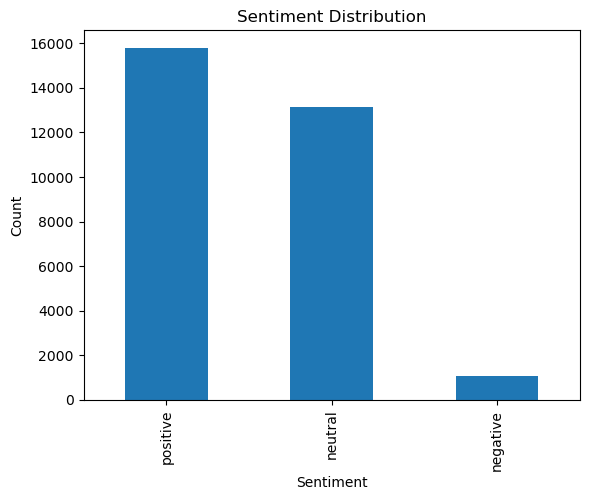

In [104]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

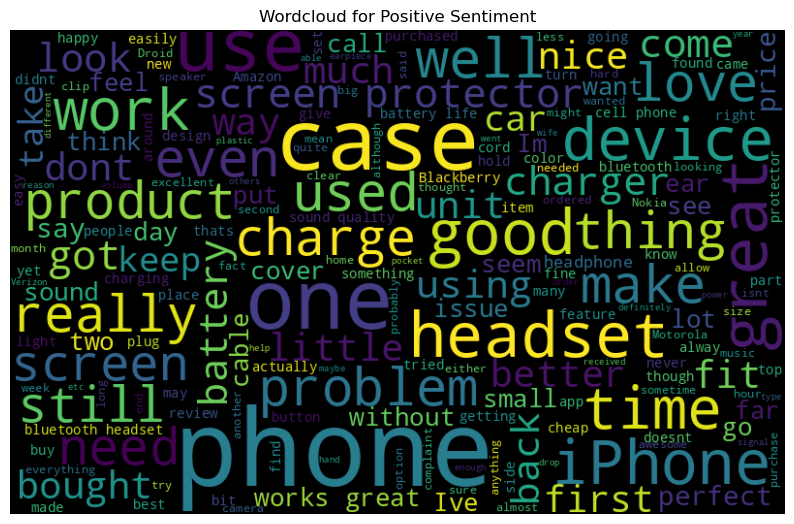

In [105]:
positive_text = df[df['sentiment'] == 'positive']['cleaned_text'].values
positive_text = ' '.join(positive_text)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud for Positive Sentiment')
plt.show()


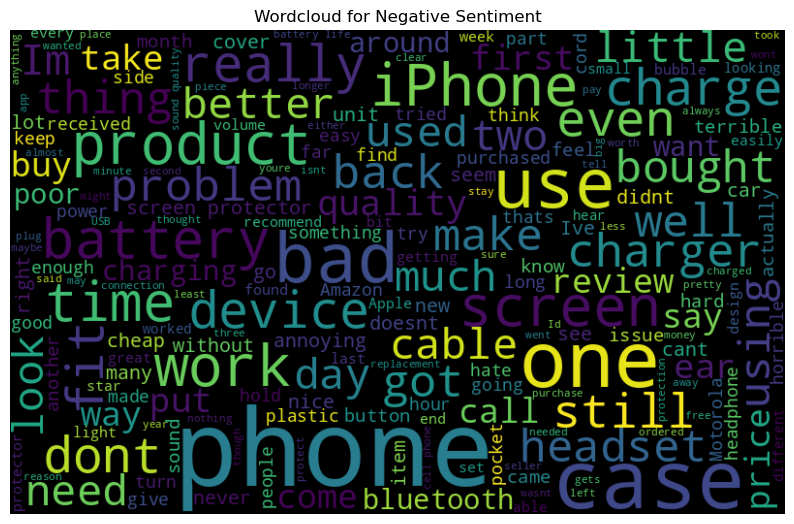

In [106]:
negative_text = df[df['sentiment'] == 'negative']['cleaned_text'].values
negative_text = ' '.join(negative_text)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud for Negative Sentiment')
plt.show()


In [107]:
print(df['sentiment'].value_counts())

sentiment
positive    15793
neutral     13150
negative     1057
Name: count, dtype: int64


In [108]:
# balancing the dataset
df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']
df_neutral = df[df['sentiment'] == 'neutral']

df_positive = df_positive.sample(n=1000, random_state=42)
df_negative = df_negative.sample(n=1000, random_state=42)
df_neutral = df_neutral.sample(n=500, random_state=42)

In [109]:
# concatenating the dataframes
df = pd.concat([df_positive, df_negative, df_neutral], ignore_index=True)


In [110]:
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)


In [111]:
df

,reviewText,overall,summary,cleaned_text,sentiment
0,"Installed about two weeks ago, took off and th...",1,Dissapointed,Installed two weeks ago took threw away today ...,negative
1,It even seemed flimsy at first and got stuck w...,1,Broke,It even seemed flimsy first got stuck trying f...,negative
2,"Purchased from ULIKE, The digitizer arrived af...",1,defective,Purchased ULIKE The digitizer arrived month de...,negative
3,I am not generally a big fan of in ear monitor...,4,Pleasant Surprise,I generally big fan ear monitors IEMs I dislik...,negative
4,I just got a imac and wanted bluetooth stereo ...,5,Really nice stereo headphones,I got imac wanted bluetooth stereo headphones ...,positive
...,...,...,...,...,...
2495,The first two weeks I had it I would give it 5...,3,good price,The first two weeks I I would give 5 stars pri...,neutral
2496,It does a very good job of protecting my scree...,5,Protects my screen,It good job protecting screen damage really da...,positive
2497,liked the matte finish. i gave it 4stars becau...,4,does the job,liked matte finish gave 4stars matter theres 2...,neutral
2498,I love this screen protecter has a few bubbles...,5,&#128525;&#128525;&#128525;&#128525;&#128525; ...,I love screen protecter bubbles doesnt bother ...,positive


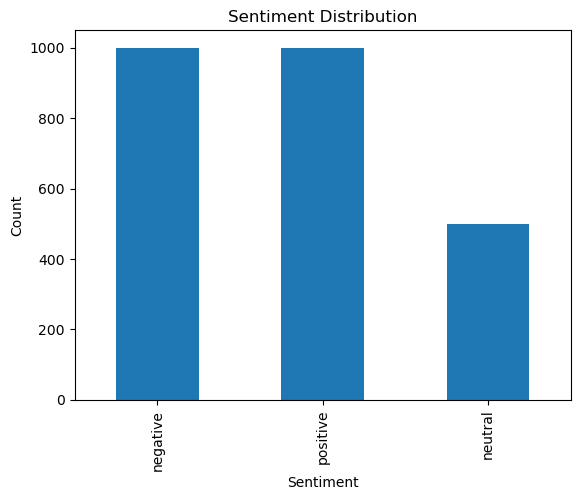

In [112]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [113]:
# print(df['sentiment'].value_counts())
print(df.head())

                                          reviewText  overall  \
0  Installed about two weeks ago, took off and th...        1   
1  It even seemed flimsy at first and got stuck w...        1   
2  Purchased from ULIKE, The digitizer arrived af...        1   
3  I am not generally a big fan of in ear monitor...        4   
4  I just got a imac and wanted bluetooth stereo ...        5   

                         summary  \
0                   Dissapointed   
1                          Broke   
2                      defective   
3              Pleasant Surprise   
4  Really nice stereo headphones   

                                        cleaned_text sentiment  
0  Installed two weeks ago took threw away today ...  negative  
1  It even seemed flimsy first got stuck trying f...  negative  
2  Purchased ULIKE The digitizer arrived month de...  negative  
3  I generally big fan ear monitors IEMs I dislik...  negative  
4  I got imac wanted bluetooth stereo headphones ...  positive  


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [115]:
reviews = df['cleaned_text'].values
labels = df['sentiment'].values


In [116]:
unique_labels = set(labels)
print("Unique Labels:", unique_labels)


Unique Labels: {'positive', 'negative', 'neutral'}


In [117]:
vectorizer = TfidfVectorizer()
vectorizer.fit(reviews)
reviews = vectorizer.transform(reviews)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)


In [119]:
print (X_train.shape, y_train.shape)

(2000, 14609) (2000,)


In [120]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])



In [121]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [122]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [123]:
model.fit(X_train_dense, y_train, epochs=15, batch_size=12, validation_split=0.2)

Epoch 1/15
134/134 [==============================] - 5s 22ms/step - loss: 1.0058 - accuracy: 0.5644 - val_loss: 0.8113 - val_accuracy: 0.7200
Epoch 2/15
134/134 [==============================] - 2s 17ms/step - loss: 0.4637 - accuracy: 0.8175 - val_loss: 0.6077 - val_accuracy: 0.7725
Epoch 3/15
134/134 [==============================] - 2s 18ms/step - loss: 0.1043 - accuracy: 0.9831 - val_loss: 0.7367 - val_accuracy: 0.7050
Epoch 4/15
134/134 [==============================] - 2s 16ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.7664 - val_accuracy: 0.7250
Epoch 5/15
134/134 [==============================] - 3s 21ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7407 - val_accuracy: 0.7325
Epoch 6/15
134/134 [==============================] - 3s 19ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7718 - val_accuracy: 0.7250
Epoch 7/15
134/134 [==============================] - 2s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7910 - val_accuracy: 0.7250

In [124]:
#test
def predict_sentiment(text):
    text = clean_text(text)
    text = vectorizer.transform([text])
    text = text.toarray()
    result = model.predict(text)
    sentiment = np.argmax(result)
    
    if sentiment == 0:
        print('negative')
    elif sentiment == 1:
        print('neutral')
    else:
        print('positive')


predict_sentiment('I love this product. It is very useful and I will buy it again.')
predict_sentiment('I will never buy. It is useless and I will never buy it again.')
predict_sentiment('It is okay. I will buy it again.')



1/1 [==============================] - 0s 143ms/step
positive
1/1 [==============================] - 0s 31ms/step
negative
1/1 [==============================] - 0s 32ms/step
neutral
